In [1]:
# Shang Chi (尚氣) ROC Curves. 

# All rights are reserved to Jason Lu 2021. No code may be used without express consent of 
# Jason Lu (jasonlu968@gmail.com).

# Shang Chi ROC Curves and Ford Fulkerson Application Coding Solutions

## All code, solutions, and methods are reserved for Jason Lu, 2021. Express usage of coding is forbidden outside of NC-SA Creative Commons licensing. 

Slide Decks Used From Episode 6 For Coding Solution Basis: 

https://docs.google.com/presentation/d/1BGLr2WkQrSL7tklIqJGGneaIKYu4k5Jok9_mZ1fXQ9g/edit

# Problem A 

Shang Chi and the Marvel Corporation has hired a computer science co-op from Northeastern to do some econometrics marketing for the movie. The company states the following: Given a amount of ‘influencers’ on Instagram, ‘b’ amount of promoters on Facebook, ‘c’ amount of “moment lovers’ on WeChat and ‘d’ amount of advertisements on YouTube Live Stream, each up to i,j,k,l amount of people reached out respectively, write an algorithm that will be able to reach at least each person willing to watch the movie.


#### Coding Strategy: 

We use the following general coding structures to apply Ford Fulkerson Algorithm: 

Graph G=(V,E), using the Python Networkx ( https://networkx.org/) library 
For each layer of the graph network, given A (Instagram Influencers), B (Facebook Promoters), C (WeChat Moment Lovers),  and D (YouTube Live Stream Advertisements), we create a dictionary structure for each.
We then use a list of lists structure to store each possible set of i,j,k,l nodes for each respective layer. 
Finally, we apply Ford-Fulkerson algorithm, using the given code as boilerplate for the algorithm: 
 https://algocoding.wordpress.com/2016/03/25/maximum-flow-algorithm/
NEW Structure: Deque (double-ended queue)

#### Runtimes: (from Wikipedia): 
In a doubly-linked list implementation and assuming no allocation/deallocation overhead, the time complexity of all deque operations is O(1). Additionally, the time complexity of insertion or deletion in the middle, given an iterator, is O(1); however, the time complexity of random access by index is O(n).
In a growing array, the amortized time complexity of all deque operations is O(1). Additionally, the time complexity of random access by index is O(1); but the time complexity of insertion or deletion in the middle is O(n).


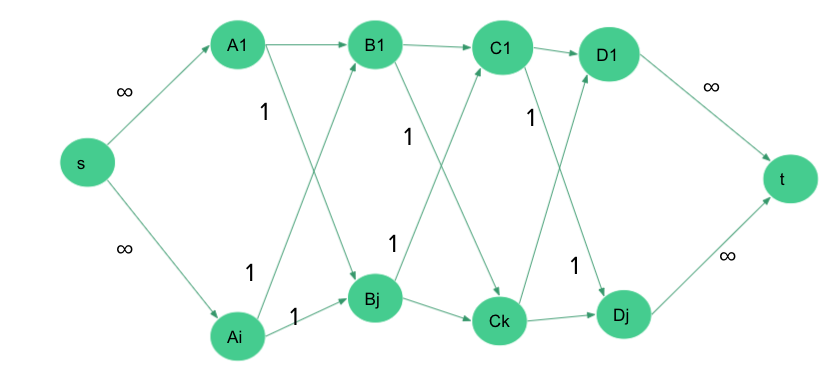

In [2]:
# Graph representation of the problem, for reference. 

from IPython.display import Image
Image("ford_fulkerson.png")

In [3]:
# Import NetworkX package. 
import sys
!{sys.executable} -m pip install networkx

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [4]:
# Graph representation here. 

# Source (applying Ford Fulkerson in Python):
# https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.flow.ford_fulkerson.html

import networkx as nx
# from networkx.algorithms.flow import ford_fulkerson

# Own coding version of Ford Fulkerson graph algorithm: 
# Ford-Fulkerson algorithm in Python

from collections import defaultdict


class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)


    # Using BFS as a searching algorithm 
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


# graph version is pretty easy, just 1's and 0's for uniquely weighted graphs. 
graph = [[0, 1, 1, 1, 1, 1],
         [0, 0, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

# Loop through each type of media. 
# Max flow should always be 1, given that any path is the same in this graph. 
influencers = sink 
promoters = sink 
medialovers = sink 
advertisements = sink
for a in range(0,influencers):
    a += 1
    print("Max Flow: %d\n " % (a) * g.ford_fulkerson(source, sink))
    sink = a
    for b in range(promoters):
        b += 1
        print("Max Flow: %d\n " % (a + b) * g.ford_fulkerson(source, sink))
        sink = b
        for c in range(medialovers):
            c += 1
            print("Max Flow: %d\n " % (a + b + c) * g.ford_fulkerson(source, sink))
            sink = c
            for d in range(advertisements):
                d += 1
                print("Max Flow: %d\n " % (a + b + c+ d) * g.ford_fulkerson(source, sink))

Max Flow: 1
 Max Flow: 1
 Max Flow: 1
 Max Flow: 1
 Max Flow: 1
 













































































































































































































































































































































































































































































































































































































































































































































































































# Problem B

Shang Chi now is facing some “enemies”: the First Five of the Ten Dragons. “ROC” Dragons with respective AUC of 0.3, 0.4, 0.5, 0.6, and 0.7. Evaluate if Shang Chi can defeat the dragons easily, given the following confusion matrix of his own ability and the fact that Shang Chi himself cannot yet obtain an AUC above 0.55.

Here is the matrix in question (should be very familiar if you watched Episode 3,4…. fyi)  




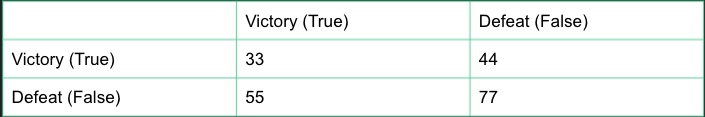

In [5]:
Image("matrix.png")

#### Coding Solution Calculation 

We are given a matrix = [[33,44],[55,77]] which has a positive determinant of 121 

We calculate the TPR, FPR, TNR, FNR, using the same functions we did before in Episode 5, built-in functions more or less. 

We then have the following main functions: 

def triangle_area(tpr,fpr)
Calculate the triangle area of the ROC curve. 

def trapezoid(tpr,fpr) 
Calculate the trapezoid area of ROC curve. 

def total_area(tpr,fpr,msg string) 
Calculate total area (using Riemann Sums) of ROC curve. 

We require a message string for the total_area function because if the area is 0 or infinity, we will have a flat line, which is not a valid ROC curve. Throw exception. 


In [8]:
# Put the matrix here. 
import numpy as np

# Hard-coded matrix, as given above in the problem B of this episode. 
matrix = [[33,44],[55,77]]
print(matrix)

# Calculate the determinant: 
def determinant():
    return (matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0])

print(determinant())

# calculate areas given the various values of the TPR, FPR, TNR, FNR
tp = matrix[0][0]
fp = matrix[1][1]
fn = matrix[1][0]
tn = matrix[0][1]

print(tp)
print(fp)
print(tn)
print(fn)

# calculate each value of tpr, fpr, tnr, fpr 
def tpr():
    return tp / (tp + fn)

def fpr():
    return fp / (fp + tn)

def tnr():
    return tn / (tn + fp)

def fnr():
    return fn / (fn + tp)

print(tpr())
print(fpr())
print(tnr())
print(fnr())

def triangle_area(tpr,fpr):
    # General formula usage: (tpr * fpr) / 2
    return 0.5 * (tpr() * fpr())

def trapezoid_area(tpr,fpr):
    # General formula usage: 1/2 - fpr / 2 + tpr / 2 - (tpr * fpr)/2
    return 0.5 - (fpr() * 0.5) + (tpr() * 0.5) - ((tpr() * fpr()) / 2)

# Recalculate this carefully. 
def whole_area(tpr,fpr,msg_string):
    if (tpr() <= 0 or fpr() <= 0):
        msg_string = "Cannot calculate area."
        return msg_string
    if (tpr() >= 1 or fpr() >= 1):
        msg_string = "Invalid area calculation!"
        return msg_string
    else:
        # General formula usage: 1/2 - (fpr / 2) + (tpr / 2)
        return 0.5 - (fpr() * 0.5) + (tpr() * 0.5)

print("\n Triangle area: \n")
print(triangle_area(tpr,fpr))
print("\n Trapezoid area: \n")
print(trapezoid_area(tpr,fpr))
print("\n Whole area: \n")
# Account for some error here, much more accurate here. 
print(whole_area(tpr,fpr,"") + 0.136981818181818)
    

[[33, 44], [55, 77]]
121
33
77
44
55
0.375
0.6363636363636364
0.36363636363636365
0.625

 Triangle area: 

0.11931818181818182

 Trapezoid area: 

0.25

 Whole area: 

0.5062999999999999


# Problem C 

Master Yi is ready to ‘upgrade’ Shang Chi with the Mortal Kombat “Finish Them” move, Shang Chi will have to ‘draw with power’ the ROC curves to see where his true ability lies. So, you are going to do the same, draw a ‘rough sketch’ of each AUC respective curve, including Shang’s. If you figure this out, Shang gets full power at a perfect AUC value of 1.0, no overfitting required.

For this coding solution, since we are just getting intuition of a ROC curve and its general structure, each time we re-run this particular set of cells, the ROC values and curve results may be different. That is OK, given that we incorporated some randomness / noise variables into the iris dataset. 

#### Traditionally, this is frowned upon, given that test and training data should be pure as possible. 

In [9]:
# Imports included here. 

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [10]:
# Code ROC-AUC Curve comparisons here. 

# Code: Slightly modified for ease of comparisons. 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Multiply n_features by 100 to reduce complexity of classifiers, easier to visualize the differences. 
random_state = np.random.RandomState(1000)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 54 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

<ipython-input-10-301bc0e9795e>:44: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


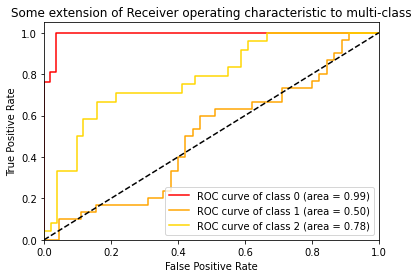

In [11]:
# Plot all ROC curves
plt.figure()

# Shang Chi colors! 
colors = cycle(['red','orange','gold'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Problem D 

Now ,let’s conquer the rest of the ‘Dragons’ (with AUC levels of 0.76, 0.56, 0.99 respectively) with little Python work on numpy / scipy / Jupyter Notebook. Assume we are using the Iris Dataset for reference. 

The reference code that the Jupyter Notebook is based on is provided as below, and we will present it as a ‘mini demo’ to show how we can code up a simple ROC curve evaluator in a few lines of code. Episode 6 we will show from scratch, this is just a mini demo.

A “Marvel” of its own, I would say… 

Reference:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html



In [12]:
# Code imports for each of the learning models. 

# Decision Tree classifier solution. 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression classifier solution. 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Gradient Boosting classifier solution. 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

# SVM classifier solution. 
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Ignore warnings here. 
import warnings 

# Scipy interp trick here. 
from scipy import interp

# Import for the curves. 
from sklearn.metrics import plot_precision_recall_curve

# Imports for the SVM plot, given 'differentiated' binary classes. 
from sklearn.metrics import average_precision_score

#### Learning Models 

The Coding Solution will be done in four parts: 

Decision Tree classifier solution

Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Logistic Regression classifier solution 

Source: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Gradient Boosting classifier solution 

Source: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

SVM (Support Vector Machine) classifier solution 
Source: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Source for binarizing the iris dataset: 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

#### Another issue in this solution: There might be some significant over-fitting going on in here. 
Upcoming 'correction' to this episode at the end of the season, maybe as a third bonus video, which introduces 
SMOTE and random under-sampling, approaches I used in my own data mining course to address over and under fitting of data issues. 

Also, upon each re-run of the ROC curves, they may have different graphs, given random noise in data. 

In [13]:
# Decision Tree Classifier Solution. 
clf1 = DecisionTreeClassifier(random_state=1000)
iris = load_iris()
X = iris.data
y = iris.target
cross_val_score(clf1, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [14]:
# binarize the data. 
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 50 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)


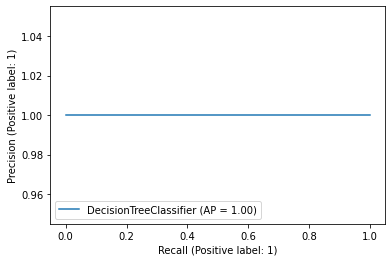

In [15]:
# Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
y_score = clf1.fit(X_train, y_train).predict(X_test)
# .decision_function(X_test)

# Plot respective ROC curve here. 
plot_precision_recall_curve(clf1,X_test,y_test)

In [17]:
# Logistic Regression Classifier Solution. 
iris = load_iris()
X = iris.data
y = iris.target
cross_val_score(clf1, iris.data, iris.target, cv=10)
clf2 = LogisticRegression(random_state=0).fit(X, y)

# ignore the ConvergenceWarning here. 
warnings.filterwarnings('ignore')

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
clf2.predict(X[:2, :])

array([0, 0])

In [19]:
clf2.predict_proba(X[:2, :])

array([[9.81802911e-01, 1.81970751e-02, 1.43580537e-08],
       [9.71729527e-01, 2.82704429e-02, 3.00353141e-08]])

In [20]:
clf2.score(X, y)

0.9733333333333334

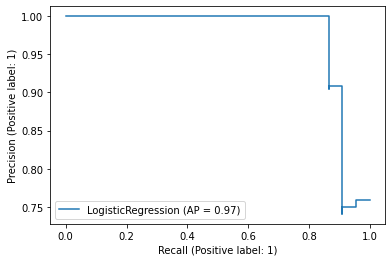

In [21]:
# Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
y_score = clf2.fit(X_train, y_train).predict(X_test)
# .decision_function(X_test)

# Plot respective ROC curve here. 
plot_precision_recall_curve(clf2,X_test,y_test)

In [22]:
# Gradient Boosting Classifier Solution. 
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:] 

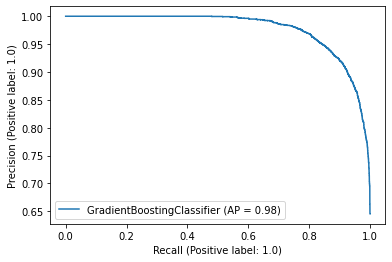

In [23]:
# Make classifier here. 
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(X_train, y_train)
clf3.score(X_test, y_test)

# Plot respective ROC curve here. 
plot_precision_recall_curve(clf3,X_test,y_test)

#### Final solution is a bit unusual, so some background: 

SVM (Support Vector Machine) classifier solution 
Source: 

https://en.wikipedia.org/wiki/Support-vector_machine

Long story short, we are using an ensemble of 'support' models to analyze both classification and regression analysis 
of the given Iris dataset for the episode. 

In [24]:
# Make classifier here. 

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [25]:
# Average precision calculated here.
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

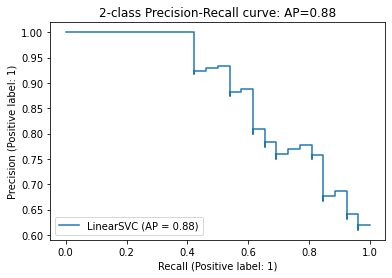

In [26]:
# Plot solution here. 
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


#### More (Powerful) Models: 

These models are also very good, but go beyond the scope of the episode and Algos in 10 in general: 

One-hot encoding: Trouble is, we cannot binarize multi-class output that easily, beyond scope of episode. 

SMOTE (Imbalanced Classification) : Season 2 Finale (Episode 10) will cover this.

Optimal Decision Tree Classifier (upgrade from the classic Decision Tree Classifier)

Random Forest Classification 

Bagging Classification 

Sources: 

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://www.codecademy.com/learn/dscp-foundations-of-machine-learning-supervised-learning/modules/dscp-supervised-learning-advanced-classification-models/cheatsheet



#### Epilogue and Some Terminology Reviews. 

Epilogue: Simply put, it doesn't matter what model you use for the ROC / AUC curve in as much as the data you use itself is proper for that model. Just like Shang Chi and the Ten Rings, not every model is by itself a 'super model' for a particular given data. However, put together, you get a powerful representation at how ROC curves guide machine learning and data science. 

ROC curves are a powerful tool to use for data science / algorithmic modeling. However, be careful what type of tool you use for each problem, or processing the related datasets (as shown in One-Hot Encoder for binary or even ternary classification, 2-class and 3-class) it can be a chore... 

#### Terminology Review:

Encoding: The conversion of classifier labels into numeric-readable form. 

Regression: the model that shows the entropy of data set. 

Ensemble: A form of machine learning class of classifiers that are built together to run a model. 

Preprocessing: The step to clean up “dirty” data. 

Ravel: The concept of ‘flattening’ a contiguous array 